In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")  # clean style

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# basic info and cleaning
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description     

In [8]:
#Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

#Strip whitespace
for col in ['director','cast','country','rating']:
    df[col] = df[col].str.strip()

In [19]:
#Feature engineering

#Strip whitespace before conversion
df['date_added'] = df['date_added'].astype(str).str.strip()  #to ensure everything is string

#Convert to datetime (auto-detect format)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

#Fill missing dates
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

#Extract year & month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

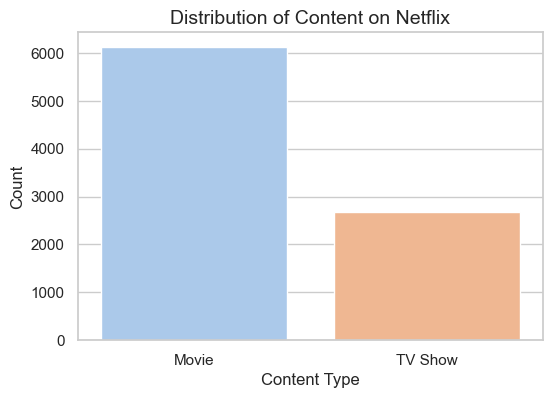

In [20]:
#Visualization 1: content type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette="pastel")
plt.title("Distribution of Content on Netflix", fontsize=14)
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

# Insight: More Movies than TV Shows

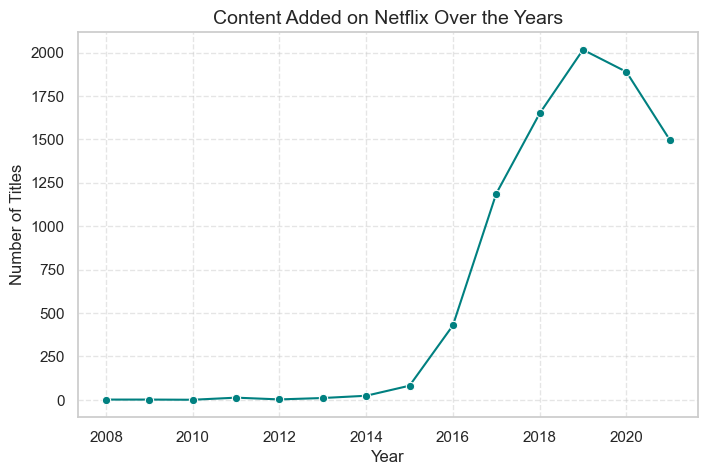

In [21]:
#Visualization 2: content added over years
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df['year_added'].value_counts().sort_index(),
    marker='o', color='teal'
)
plt.title("Content Added on Netflix Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Insight: Rapid growth after 2016

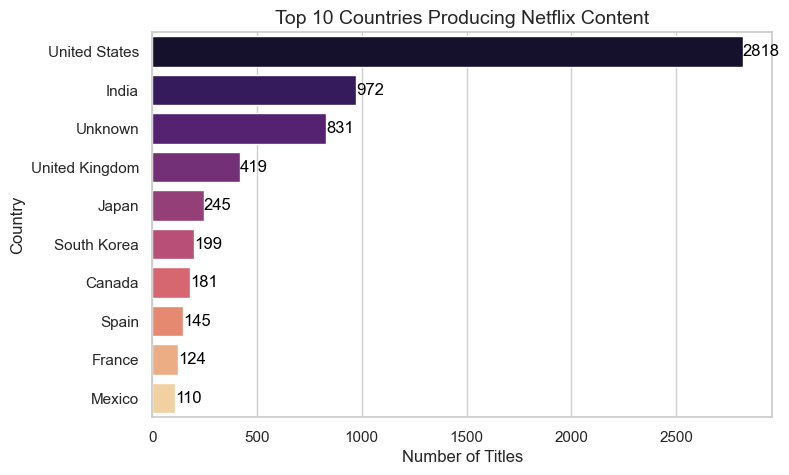

In [22]:
#Visualization 3: top 10 content-producing countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries Producing Netflix Content", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
#Annotate bars
for i, v in enumerate(top_countries.values):
    plt.text(v + 1, i, str(v), color='black', va='center')
plt.show()

# Insight: USA dominates Netflix content production

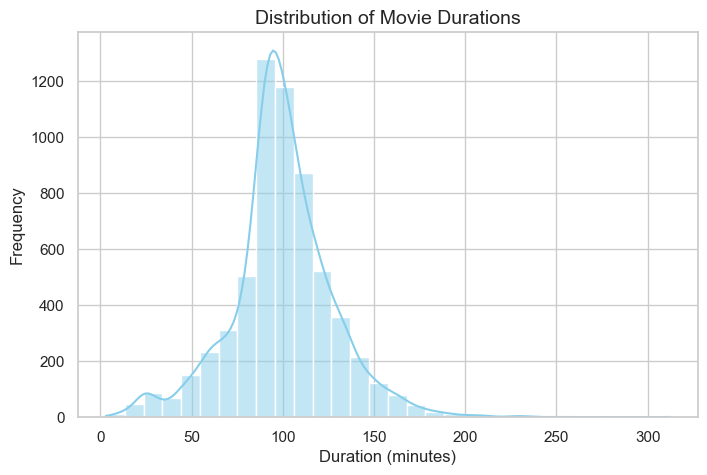

In [23]:
#Visualization 4: movie duration distribution
movies = df[df['type'] == 'Movie']
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_num'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations", fontsize=14)
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

# Insight: Most movies are 80–120 minutes

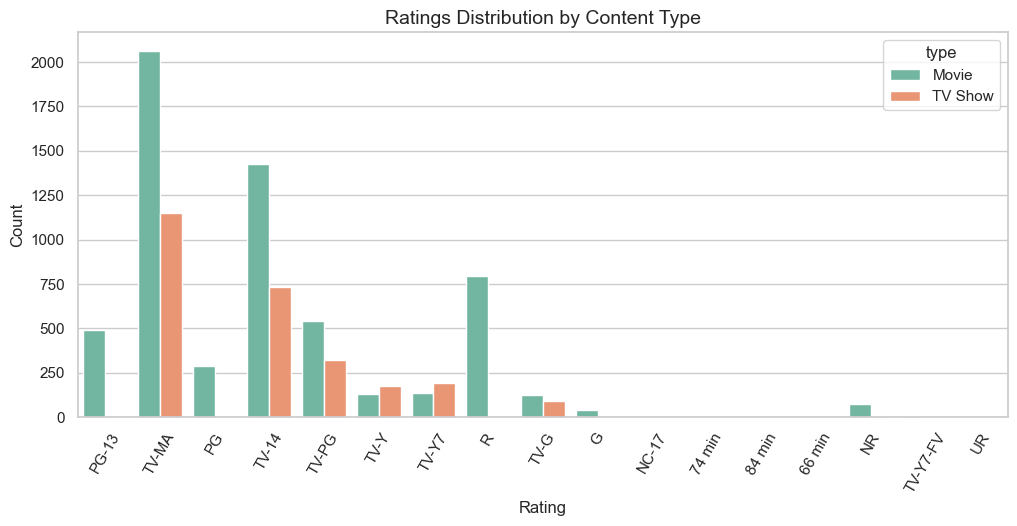

In [24]:
#Visualization 5: ratings vs content type
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='rating', hue='type', palette='Set2')
plt.xticks(rotation=60)
plt.title("Ratings Distribution by Content Type", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Insight: TV Shows dominate mature ratings (TV-MA), while Movies are more evenly distributed across teen and mature ratings (PG-13, R, TV-14).

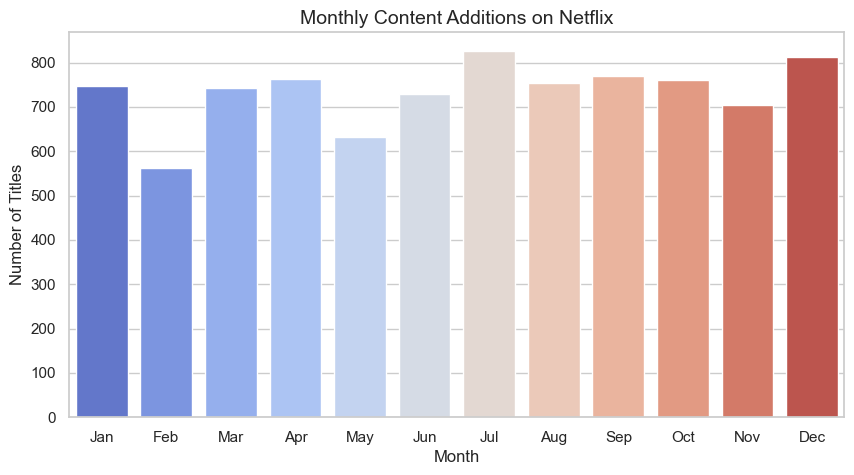

In [25]:
#Monthly trend of content additions
short_months = [calendar.month_abbr[m] for m in monthly.index]

plt.figure(figsize=(10,5))
sns.barplot(x=short_months, y=monthly.values, palette="coolwarm")
plt.title("Monthly Content Additions on Netflix", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

# Insight: Content additions peak mid-year

# Netflix EDA – Project Summary

This project explores trends in Netflix’s content library using Exploratory Data Analysis (EDA).

### Key Insights
- **Movies dominate** Netflix content oves TV Shows.
- Netflix content saw **rapid growth after 2016**.
- **USA produces** the majority of Netflix titles.
- Most movies have a duration of **80–120 minutes**.
- **TV Shows dominate mature ratings**, while Movies are more diverse in rating.
- **Content additions peak mid-year**, indicating seasonal release srategies.
